In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn .metrics import r2_score
import statsmodels.api as sm

In [91]:
data = pd.read_csv("day.csv")

In [92]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [93]:
data.shape

(730, 16)

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [95]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# drop the columns which are not necessary for analysis
1. Instant : It is the index of every row which is not required for analysis.
2. dteday: As we already have month and year in seprate columns, we dont need date column.
3. Casual and registered count will get on the day of booking and as per the problem statement for prediction we dont need these variable.

In [96]:
# Column drop code

data = data.drop(['instant','dteday','casual','registered'],axis=1)

In [97]:
# after dropping data display
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [98]:
# renaming the columns to actual words

data.columns = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday','weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'count']

In [99]:
data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


# Data Visualization

1. Data visualization for numeric data
2. Data visualization for categorical data

As per the given data below is the list of numeric and categorical columns list respectively

#### Numeric Column:
<i>'temp', 'atemp', 'humidity', 'windspeed'</i>, => Predictor variable <br>
<i>'count'</i> => Target Variable
    
#### Categorical Column:

<i>'season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit',</i> => Predictor Variable

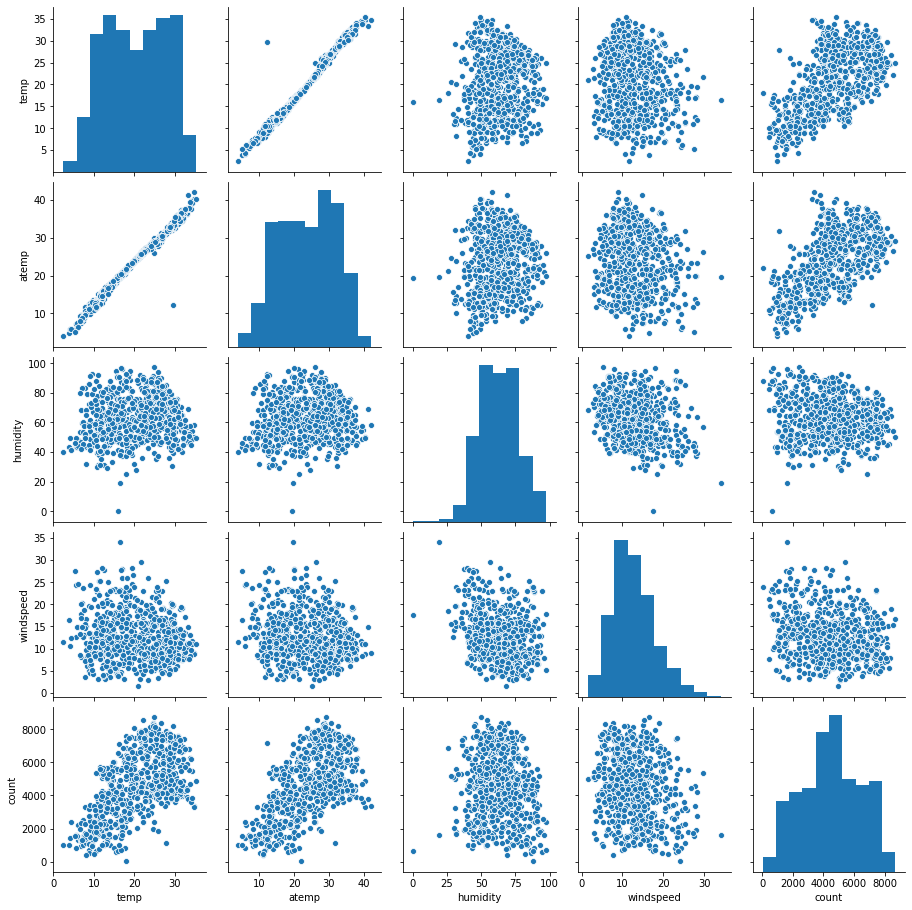

In [100]:
# Numerical Data visualization 

sns.pairplot(data[['temp', 'atemp', 'humidity', 'windspeed','count']])
plt.show()

## findings from above plot

1. We can see that the variable temp and atemp have high positive correlation
2. We can see that variable temp and atemp has positive correlation with target variable count also.
3. Other variables like humidity and windspeed is not showing correlation with target variable.

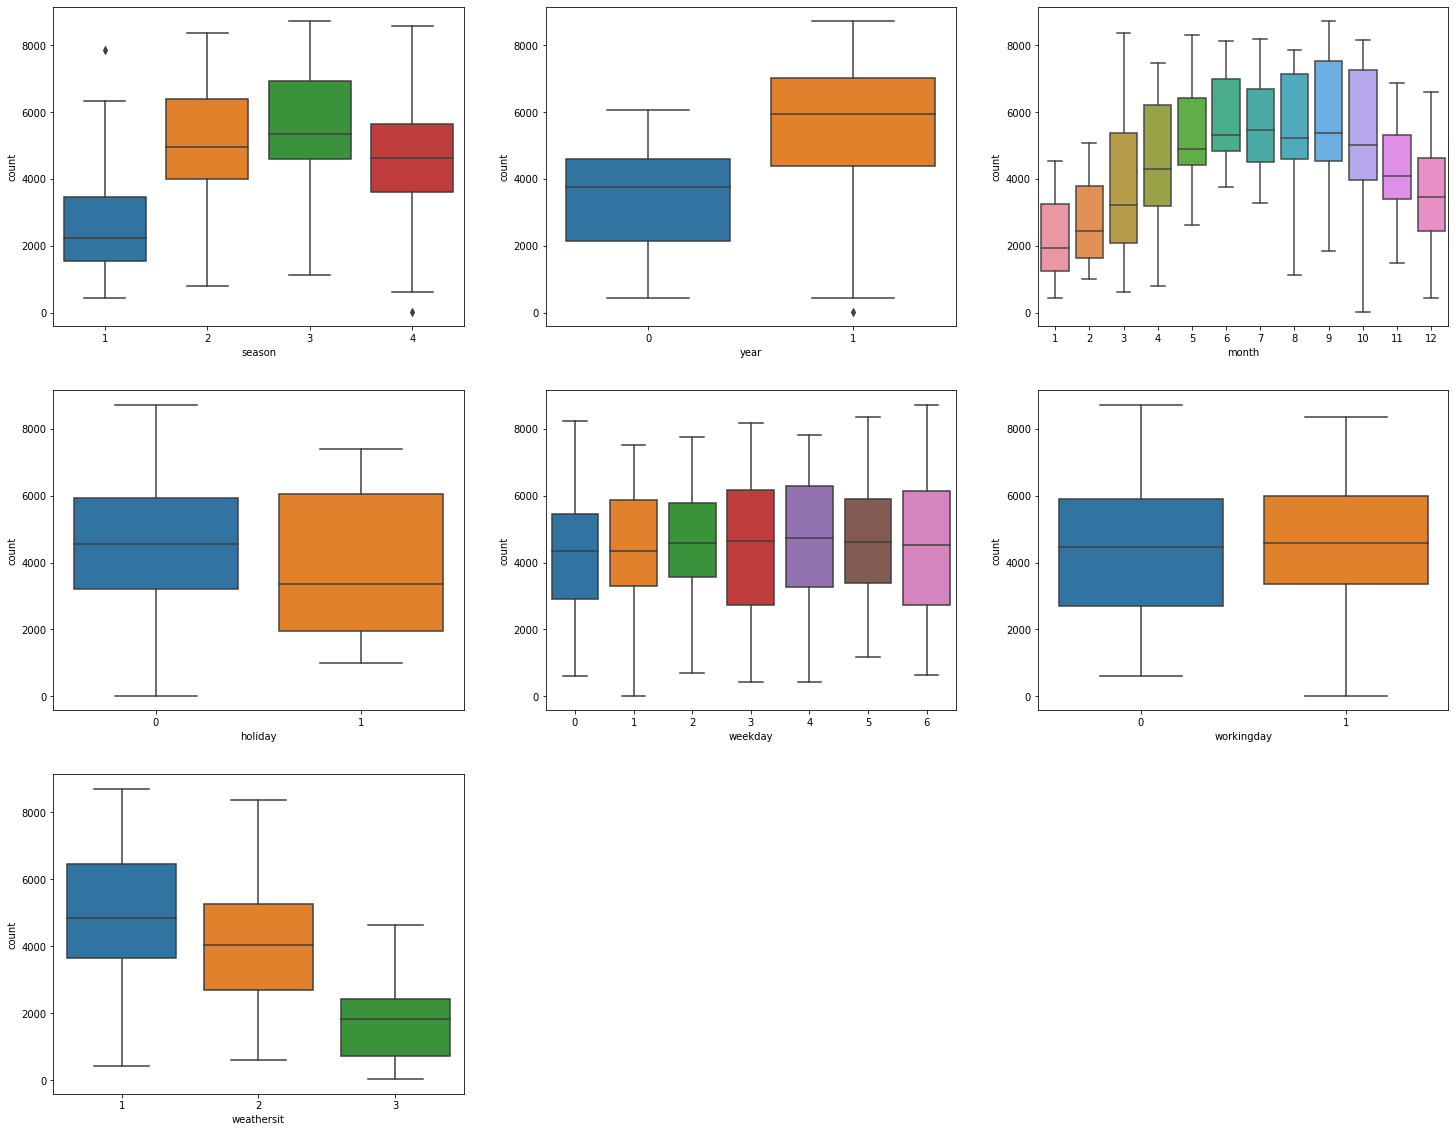

In [101]:
# Categorical variable box plot

plt.figure(figsize=(25,20))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='count', data = data)
plt.subplot(3,3,2)
sns.boxplot(x='year',y='count', data = data)
plt.subplot(3,3,3)
sns.boxplot(x='month',y='count', data = data)
plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='count', data = data)
plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='count', data = data)
plt.subplot(3,3,6)
sns.boxplot(x='workingday',y='count', data = data)
plt.subplot(3,3,7)
sns.boxplot(x='weathersit',y='count', data = data)
plt.show()

## Findings from above plot
1. We can see season 2 and season 3 has more number of bike rentals than season 1 and season 4.
2. We can see year 2019 is having more number of bike rentals than 2018.
3. We can see Clear weather is having more rentals compare to other categories.
4. Mid of the year is having more rentals than start and end of the year.



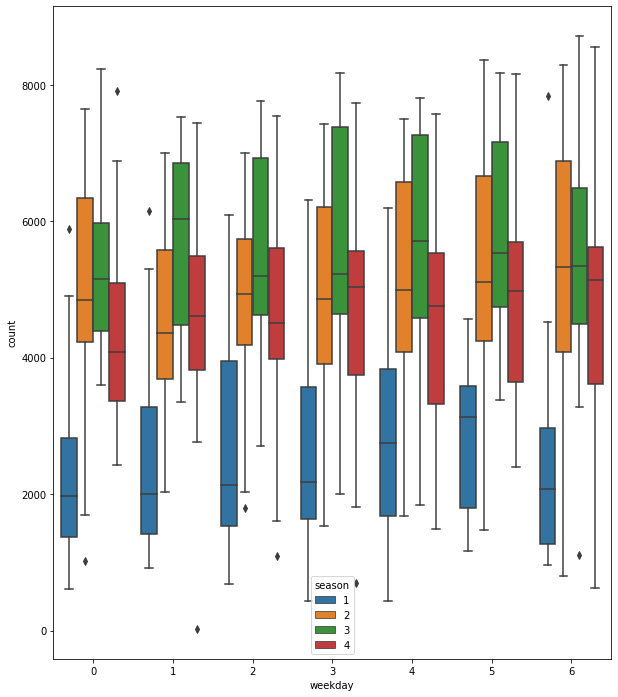

In [102]:
# Checking categorical variable with hue

plt.figure(figsize=(10,12))
sns.boxplot(x = 'weekday', y = 'count', data = data, hue = 'season')
plt.show()

## finding from above plot

We can see season 1 i.e Spring season is having less number of bike rentals compared to other seasons

# Data Preparation

1. Categorical variable: We have encode the data for those variable where we have more than two category
2. Numberical variable: We have to perform scaling for numerical feature

In [103]:
# Categorical feature with more than 2 category
# season, mnth, workingday, weathersit

"""
Steps:
1. created different columns for each category.
2. renaming the columns 
"""


# season
season = pd.get_dummies(data['season'], drop_first=True)
season.columns = ['season_2','season_3','season_4']

# mnth
month = pd.get_dummies(data['month'], drop_first= True)
month.columns = ['month_2','month_3','month_4','month_5','month_6','month_7','month_8','month_9','month_10','month_11','month_12']

# weekday
weekday = pd.get_dummies(data['weekday'], drop_first= True)
weekday.columns = ['weekday_1','weekday_2','weekday_3','weekday_4','weekday_5','weekday_6']

# weathersit
weathersit = pd.get_dummies(data['weathersit'], drop_first= True)
weathersit.columns = ['weathersit_2','weathersit_3']

# concate these variable to actual data

data = pd.concat([data,season,month,weekday,weathersit], axis = 1)

data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,0,1,1,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,1,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,0,0,0


In [147]:
# train test split

from sklearn.model_selection import train_test_split

# drop categorical variable which we have encoded

data = data.drop(['season','month','weekday','weathersit'], axis = 1)

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [148]:
df_train.shape

(510, 30)

In [149]:
# numerical feature scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# numerical variable

num_vars = ['temp', 'atemp', 'humidity', 'windspeed']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,season_2,season_3,...,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,-0.121335,-0.055878,-0.514725,-0.117752,7534,0,0,...,0,0,0,1,0,0,0,0,0,0
576,1,0,1,1.231731,1.194106,0.516433,-0.330615,7216,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,-0.420478,-0.348834,-0.069854,-0.385694,4066,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,-1.294913,-1.473492,-1.045032,2.018143,1796,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,-0.627580,-0.571474,-1.000840,-0.779889,4220,1,0,...,0,0,0,0,0,0,0,1,1,0


In [150]:
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,season_2,season_3,...,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,5.100000e+02,5.100000e+02,5.100000e+02,5.100000e+02,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,-2.333645e-16,4.231909e-16,-3.831358e-16,-2.542628e-16,4486.382353,0.245098,0.262745,...,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.343137,0.029412
std,0.500429,0.157763,0.468282,1.000982e+00,1.000982e+00,1.000982e+00,1.000982e+00,1952.158739,0.430568,0.440557,...,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.475223,0.169124
min,0.000000,0.000000,0.000000,-2.381246e+00,-2.417741e+00,-4.462565e+00,-1.890981e+00,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,-8.749555e-01,-8.526058e-01,-7.666192e-01,-7.167878e-01,3120.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,1.443562e-02,6.514277e-02,2.294988e-02,-1.415145e-01,4530.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,8.773604e-01,8.269866e-01,7.167702e-01,5.522525e-01,5973.500000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,2.050938e+00,2.295305e+00,2.399023e+00,4.004188e+00,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


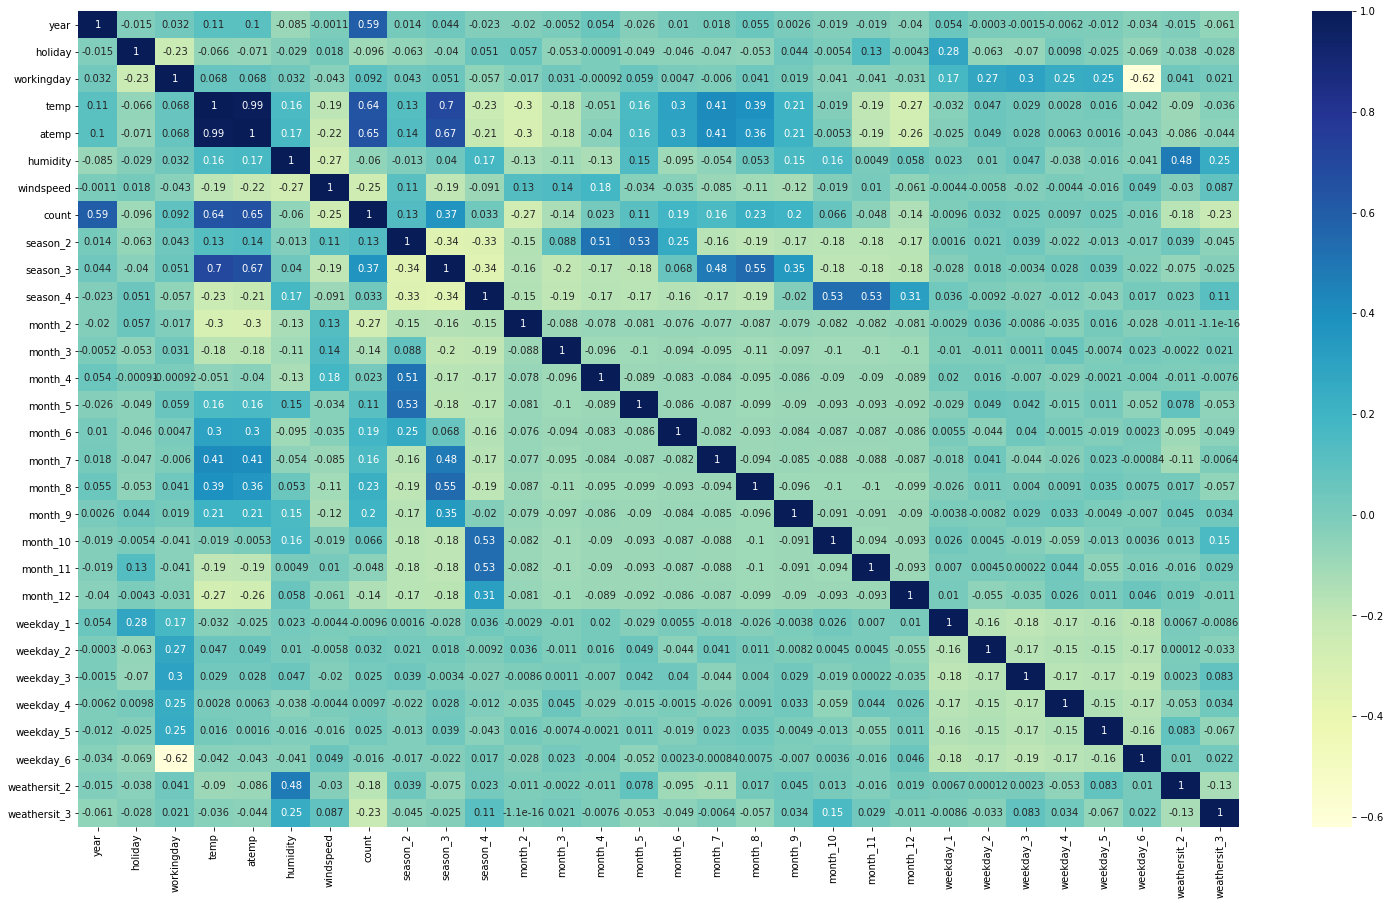

In [151]:
# correlation of all the variables

plt.figure(figsize = (26, 15))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

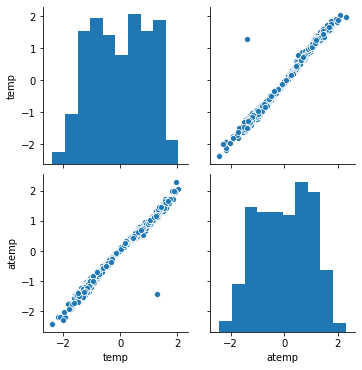

In [152]:
# checking temp and atemp correlation

sns.pairplot(df_train[['temp','atemp']])
plt.show()

#### As we can see in above graph that the temp and atemp variable are positively correlated and almost same we are dropping temp as atemp is making more sense with user perspective


In [153]:
df_train = df_train.drop(['temp'], axis = 1)

In [154]:
df_train.head()

,year,holiday,workingday,atemp,humidity,windspeed,count,season_2,season_3,season_4,...,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,-0.055878,-0.514725,-0.117752,7534,0,0,1,...,0,0,0,1,0,0,0,0,0,0
576,1,0,1,1.194106,0.516433,-0.330615,7216,0,1,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,-0.348834,-0.069854,-0.385694,4066,0,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,-1.473492,-1.045032,2.018143,1796,0,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,-0.571474,-1.000840,-0.779889,4220,1,0,0,...,0,0,0,0,0,0,0,1,1,0


In [155]:
# diving data in X_train and y_train

y_train = df_train.pop('count')
X_train = df_train

## Building Linear model

1. We will use RFE approach first with 22 variable.
2. Will make the stats model using those 22 features.
3. We will check the p-value and VIF value
4. On the basis of p-value and VIF value will drop the features

In [156]:
# importing RFE and Linear Regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [157]:
# Running RFE with 22 output variable
lm = LinearRegression()
lm.fit(X_train,y_train)

# Running RFE
rfe = RFE(lm,22)
rfe = rfe.fit(X_train,y_train)

In [158]:
# check what all features comes under 22 features

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('month_2', True, 1),
 ('month_3', True, 1),
 ('month_4', True, 1),
 ('month_5', True, 1),
 ('month_6', True, 1),
 ('month_7', True, 1),
 ('month_8', True, 1),
 ('month_9', True, 1),
 ('month_10', True, 1),
 ('month_11', True, 1),
 ('month_12', False, 2),
 ('weekday_1', False, 3),
 ('weekday_2', False, 4),
 ('weekday_3', False, 6),
 ('weekday_4', False, 7),
 ('weekday_5', False, 5),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [159]:
# displaying rfe columns

col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'workingday', 'atemp', 'humidity', 'windspeed',
       'season_2', 'season_3', 'season_4', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

## First Linear Model

In [160]:
# Building model using Stats model with rfe data

# train data of rfe support feature
X_train = X_train[col]

# Adding a constant
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train,X_train_lm).fit()

print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     125.0
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          2.55e-184
Time:                        11:21:13   Log-Likelihood:                -4104.3
No. Observations:                 510   AIC:                             8255.
Df Residuals:                     487   BIC:                             8352.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2188.6972    175.734     12.455   

In [161]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,season_3,13.00
6,season_2,8.52
15,month_8,6.54
14,month_7,5.63
8,season_4,4.87
2,workingday,4.53
12,month_5,4.45
16,month_9,4.11
11,month_4,4.08
13,month_6,4.07


Findings:
1. month_11 is having largest p-value of .722
2. season_3 is having largest VIF value of 13
3. We are going to drop month_11 in next step

## Second Linear Model

In [162]:
# dropping month_11

X_train = X_train.drop(['month_11'], axis = 1)

X_train_lm = sm.add_constant(X_train)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     131.2
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          2.34e-185
Time:                        11:21:22   Log-Likelihood:                -4104.4
No. Observations:                 510   AIC:                             8253.
Df Residuals:                     488   BIC:                             8346.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2195.3059    174.592     12.574   

In [163]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,season_3,12.25
6,season_2,8.38
15,month_8,6.20
14,month_7,5.34
2,workingday,4.53
12,month_5,4.39
11,month_4,4.01
13,month_6,3.94
16,month_9,3.75
3,atemp,3.58


Findings:
1. We can see month_7 is having largest p-value of 0.342.
2. We will be dropping month_7 in next step

## 3rd Linear Model

In [164]:
# dropping month_7

X_train = X_train.drop(['month_7'], axis = 1)

X_train_lm = sm.add_constant(X_train)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     137.7
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          3.08e-186
Time:                        11:21:34   Log-Likelihood:                -4104.8
No. Observations:                 510   AIC:                             8252.
Df Residuals:                     489   BIC:                             8341.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2266.0249    157.920     14.349   

In [165]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,season_2,7.03
7,season_3,5.33
2,workingday,4.35
12,month_5,3.47
11,month_4,3.33
3,atemp,3.02
8,season_4,2.56
18,weathersit_2,2.37
13,month_6,2.23
14,month_8,2.01


Findings: 
1. We can see monht_2 is having highest p-value of .210, we are going to drop month_2 in next step.
2. Large drop in VIF values

## 4th Linear Model

In [166]:
# dropping month_2

X_train = X_train.drop(['month_2'], axis = 1)

X_train_lm = sm.add_constant(X_train)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     144.7
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          5.51e-187
Time:                        11:21:59   Log-Likelihood:                -4105.7
No. Observations:                 510   AIC:                             8251.
Df Residuals:                     490   BIC:                             8336.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2344.2519    145.168     16.149   

In [167]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,season_2,7.02
7,season_3,5.32
2,workingday,4.12
11,month_5,3.46
10,month_4,3.29
3,atemp,2.92
8,season_4,2.39
17,weathersit_2,2.36
12,month_6,2.23
13,month_8,2.01


Findings:
1. month_4 is having highest p-value of .108
2. Not much change in VIF values

## 5th Linear Model

In [168]:
# dropping month_4

X_train = X_train.drop(['month_4'], axis = 1)

X_train_lm = sm.add_constant(X_train)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     152.1
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.59e-187
Time:                        11:22:24   Log-Likelihood:                -4107.0
No. Observations:                 510   AIC:                             8252.
Df Residuals:                     491   BIC:                             8332.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2379.4757    143.740     16.554   

In [169]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,season_3,5.27
2,workingday,4.08
3,atemp,2.92
6,season_2,2.91
8,season_4,2.39
16,weathersit_2,2.36
12,month_8,1.97
4,humidity,1.96
0,year,1.93
10,month_5,1.88


Findings:
1. month_6 is having highest p-value of .112
2. Change in sequence of VIF values

## 6th Linear Model

In [170]:
# dropping month_6

X_train = X_train.drop(['month_6'], axis = 1)

X_train_lm = sm.add_constant(X_train)

lr_6 = sm.OLS(y_train, X_train_lm).fit()

print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     160.4
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          4.33e-188
Time:                        11:22:37   Log-Likelihood:                -4108.3
No. Observations:                 510   AIC:                             8253.
Df Residuals:                     492   BIC:                             8329.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2432.0423    140.106     17.359   

In [171]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,season_3,5.26
2,workingday,3.99
3,atemp,2.72
6,season_2,2.66
8,season_4,2.39
15,weathersit_2,2.36
4,humidity,1.95
0,year,1.93
11,month_8,1.86
14,weekday_6,1.68


Findings:
1. holiday is having highest p-value of 0.81
2. NOt much change in VIF values

## 7th Linear model

In [172]:
# dropping holiday

X_train = X_train.drop(['holiday'], axis = 1)

X_train_lm = sm.add_constant(X_train)

lr_7 = sm.OLS(y_train, X_train_lm).fit()

print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.5
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.48e-188
Time:                        11:22:49   Log-Likelihood:                -4109.9
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     493   BIC:                             8326.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2362.4617    134.605     17.551   

In [173]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,season_3,5.11
1,workingday,3.77
2,atemp,2.65
5,season_2,2.61
14,weathersit_2,2.35
7,season_4,2.32
3,humidity,1.94
0,year,1.92
10,month_8,1.86
9,month_5,1.66


Finding:
1. season_3 is having VIF value more than 5

## 8th Linear model

In [174]:
# dropping season_3

X_train = X_train.drop(['season_3'], axis = 1)

X_train_lm = sm.add_constant(X_train)

lr_7 = sm.OLS(y_train, X_train_lm).fit()

print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     177.3
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          9.73e-188
Time:                        11:22:59   Log-Likelihood:                -4114.6
No. Observations:                 510   AIC:                             8261.
Df Residuals:                     494   BIC:                             8329.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2612.4305    106.954     24.426   

In [175]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,2.89
13,weathersit_2,2.27
5,season_2,2.16
6,season_4,2.15
0,year,1.89
3,humidity,1.86
8,month_5,1.65
11,month_10,1.63
2,atemp,1.59
9,month_8,1.50


Findings:
1. month_5 and month_3 is having p-value greater than 0.05.
2. We are going to drop month_5 as its p-value is more than month_3
3. All the VIF's values are less than 5

## 9th Linear Model

In [176]:
# dropping month_5

X_train = X_train.drop(['month_5'], axis = 1)

X_train_lm = sm.add_constant(X_train)

lr_9 = sm.OLS(y_train, X_train_lm).fit()

print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.3
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          2.20e-188
Time:                        11:23:17   Log-Likelihood:                -4115.8
No. Observations:                 510   AIC:                             8262.
Df Residuals:                     495   BIC:                             8325.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2623.6654    106.843     24.556   

In [177]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,2.86
12,weathersit_2,2.27
6,season_4,2.14
0,year,1.89
3,humidity,1.83
5,season_2,1.64
10,month_10,1.63
2,atemp,1.58
8,month_8,1.49
11,weekday_6,1.44


Findings:
1. month_3 p-value is greater than 0.05.
2. Not much change in VIF values

## 10th Linear Model

In [178]:
# dropping month_3

X_train = X_train.drop(['month_3'], axis = 1)

X_train_lm = sm.add_constant(X_train)

lr_10 = sm.OLS(y_train, X_train_lm).fit()

print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.4
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          3.59e-189
Time:                        11:23:25   Log-Likelihood:                -4116.6
No. Observations:                 510   AIC:                             8261.
Df Residuals:                     496   BIC:                             8321.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2641.2208    106.089     24.896   

In [179]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,2.75
11,weathersit_2,2.27
6,season_4,2.09
0,year,1.88
3,humidity,1.82
5,season_2,1.63
9,month_10,1.63
2,atemp,1.55
7,month_8,1.49
10,weekday_6,1.41


Findings:
1. All the p-values are less than 0.05
2. All the VIF values are less than 5
3. We have in total 13 Features in this model.
4. As there is no insignificant variable, I am considering this as final model

# Residual Analysis
1. check residual are normally distributed or not
2. No Heteroskedasticity: plot residual vs fitted values, if it form funnel shape then heteroskedasticity is there.


In [180]:
# Prediction of target variable using train data and 10th model
y_predict_train = lr_10.predict(X_train_lm)

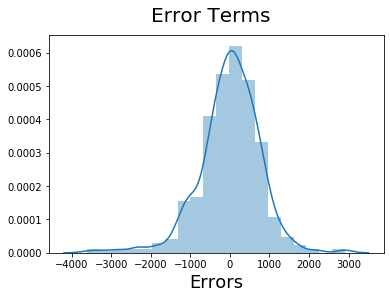

In [181]:
# plot the histogram of the difference of actual target variable and predicted target variable.
# plot to check residuals are normally distributed or not
fig = plt.figure()
sns.distplot((y_train - y_predict_train), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18)
plt.show()

## Finding from above graph

We can see that the residuals are normally distributed.

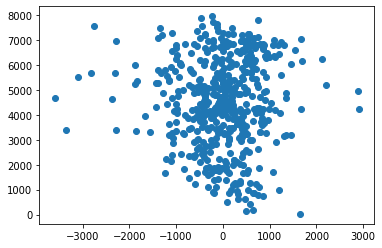

In [182]:
# Heteroskedasticity
# x-axis is residual and y-axis is fitted values
plt.scatter((y_train - y_predict_train), y_predict_train)
plt.show()

## Finding from above graph

We can there is no funnel shape formed in the plot, so no heteroskedasticity

# Prediction and evaluation 

In [183]:
# Scaling the numerical variable using scaler of train data

num_vars = ['temp','atemp','humidity','windspeed']

df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,season_2,season_3,...,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,0,1,0,1.305371,1.209703,0.047995,-1.394498,6043,0,1,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,1.613721,1.553413,-0.276087,-0.984730,6211,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,-0.112129,-0.079386,1.285378,0.079219,2659,0,0,...,0,0,0,0,0,1,0,0,1,0
221,0,0,1,1.526280,1.330748,-1.463381,0.110839,4780,0,1,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,1.240938,1.076847,-2.305983,1.277165,4968,1,0,...,0,0,0,0,0,1,0,0,0,0


In [184]:
# splitting data in X_test and y_yest

y_test = df_test.pop('count')
X_test = df_test

In [185]:
# taking only those column which are used in final model

X_test = X_test[X_train.columns]
X_test.head()

,year,workingday,atemp,humidity,windspeed,season_2,season_4,month_8,month_9,month_10,weekday_6,weathersit_2,weathersit_3
184,0,0,1.209703,0.047995,-1.394498,0,0,0,0,0,0,1,0
535,1,1,1.553413,-0.276087,-0.984730,1,0,0,0,0,0,0,0
299,0,1,-0.079386,1.285378,0.079219,0,1,0,0,1,0,1,0
221,0,1,1.330748,-1.463381,0.110839,0,0,1,0,0,0,0,0
152,0,1,1.076847,-2.305983,1.277165,1,0,0,0,0,0,0,0


In [186]:
# adding contant in test data
X_test_sm = sm.add_constant(X_test)

# prediction using 10th linear model
y_test_predict = lr_10.predict(X_test_sm)


In [187]:
# evaluate
r2_score(y_true=y_test, y_pred=y_test_predict)

0.8169207914931179

## Model Interpretation

1. Train R2 score is: .842
2. Test R2 score is: .816
3. Final model is having 13 features and all the features are significant.
4. 4 important features are: atemp, year, season_4 and month_9
5. As we can see in pair plot atemp is more correlated to target variable and in final model also it is coming one of the important variable.
6. Year is also one of the important factor as we have seen in categorical variable analysis